# Housing Price Prediction

This project aims to predict the prices of housing with regression techniques and ANN (Artificial Neural Network).

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.dummy import DummyRegressor

In [2]:
# importing data
df = pd.read_csv('housing price dataset.csv')
pd.set_option('display.max_rows', 81)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [3]:
# setting input features and output labels
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [4]:
# handling categorical data
categorical_columns = [(1, 'MSZoning'), (4, 'Street'), (5, 'Alley'), (6, 'LotShape'),
                       (7, 'LandContour'), (8, 'Utilities'), (9, 'LotConfig'),
                       (10, 'LandSlope'), (11, 'Neighborhood'), (12, 'Condition1'),
                       (13, 'Condition2'), (14, 'BldgType'), (15, 'HouseStyle'),
                       (20, 'RoofStyle'), (21, 'RoofMatl'), (22, 'Exterior1st'),
                       (23, 'Exterior2nd'), (24, 'MasVnrType'), (26, 'ExterQual'),
                       (27, 'ExterCond'), (28, 'Foundation'), (29, 'BsmtQual'),
                       (30, 'BsmtCond'), (31, 'BsmtExposure'), (32, 'BsmtFinType1'),
                       (34, 'BsmtFinType2'), (38, 'Heating'), (39, 'HeatingQC'),
                       (40, 'CentralAir'), (41, 'Electrical'), (52, 'KitchenQual'),
                       (54, 'Functional'), (56, 'FireplaceQu'), (57, 'GarageType'),
                       (59, 'GarageFinish'), (62, 'GarageQual'), (63, 'GarageCond'),
                       (64, 'PavedDrive'), (71, 'PoolQC'), (72, 'Fence'),
                       (73, 'MiscFeature'), (77, 'SaleType'), (78, 'SaleCondition')]

for col_index, col_name in categorical_columns[::-1]:
    col_cat = pd.get_dummies(X.iloc[:, col_index], drop_first=True)
    X.drop(col_name, axis=1, inplace=True)
    X = pd.concat([X, col_cat], axis=1)
    
X.replace(np.nan, 0, inplace=True)

In [5]:
# splitting training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Dummy Regressor

The Dummy Regressor predicts that all prices are the mean price of the training dataset.

It is used as a benchmark to gauge our performance in the machine learning models used later.

In [6]:
# dummy regressor
dummy_majority = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_train_pred = dummy_majority.predict(X_train)
y_test_pred = dummy_majority.predict(X_test)

print('Dummy Regressor Training Scores:')
print('   R-squared: {:.3f}'.format(dummy_majority.score(X_train, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Dummy Regressor Test Scores:')
print('   R-squared: {:.3f}'.format(dummy_majority.score(X_test, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

dummy_score_df = pd.Series(['Dummy Regressor', 
                             dummy_majority.score(X_test, y_test), 
                             metrics.mean_absolute_error(y_test, y_test_pred),
                             metrics.mean_squared_error(y_test, y_test_pred),
                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                           index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Dummy Regressor Training Scores:
   R-squared: 0.000
   MAE: 57634.244
   MSE: 6208271071.287
   RMSE: 78792.583
--------------------------------------------------------
Dummy Regressor Test Scores:
   R-squared: -0.000
   MAE: 56661.181
   MSE: 6602482572.907
   RMSE: 81255.662
--------------------------------------------------------


In [7]:
# scaling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

A simple linear model predicts the housing price $\hat y$ using a linear combination of input features $x$.

$\hat y = w_0 + w_1 x_1 + ... + w_p x_p$ ,

where $w_1, ..., w_p$ represents the coefficients and $w_0$ represents the intercept

The Ordinary Least Squares method is used to minimise the residual sum of squares $\min\limits_{w}||Xw-y||_2^2$

In [8]:
# linear regression
linreg = LinearRegression().fit(X_train_scaled, y_train)
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

print('Linear Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Linear Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

linreg_score_df = pd.Series(['Linear Regression', 
                              linreg.score(X_test_scaled, y_test), 
                              metrics.mean_absolute_error(y_test, y_test_pred),
                              metrics.mean_squared_error(y_test, y_test_pred),
                              np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                            index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Linear Regression Training Scores:
   R-squared: 0.944
   MAE: 12228.367
   MSE: 345176984.052
   RMSE: 18578.939
--------------------------------------------------------
Linear Regression Test Scores:
   R-squared: -321546434806041856.000
   MAE: 4810089878333.204
   MSE: 2122822807168055790849228800.000
   RMSE: 46074101262727.367
--------------------------------------------------------


### Ridge Regression

Ridge regression imposes a penalty term on the size of the coefficients.

It aims to minimise a penalised residual sum of squares  $\min\limits_{w}||Xw-y||_2^2 + \alpha ||w||_2^2$

In [9]:
# ridge regression
linridge = Ridge(alpha=15, max_iter = 10000).fit(X_train_scaled, y_train)
y_train_pred = linridge.predict(X_train_scaled)
y_test_pred = linridge.predict(X_test_scaled)

print('Ridge Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Ridge Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

linridge_score_df = pd.Series(['Ridge Regression', 
                               linridge.score(X_test_scaled, y_test), 
                               metrics.mean_absolute_error(y_test, y_test_pred),
                               metrics.mean_squared_error(y_test, y_test_pred),
                               np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                              index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Ridge Regression Training Scores:
   R-squared: 0.900
   MAE: 15221.681
   MSE: 618727597.740
   RMSE: 24874.236
--------------------------------------------------------
Ridge Regression Test Scores:
   R-squared: 0.780
   MAE: 19086.710
   MSE: 1451694734.094
   RMSE: 38101.112
--------------------------------------------------------


### Lasso Regression

Lasso regression adds a regulaization term to a linear model.

It aims to minimise the least-squares penalty $\min\limits_{w}\frac{1}{2n_{samples}}||Xw-y||_2^2 + \alpha ||w||_1$

In [10]:
# lasso regression
linlasso = Lasso(alpha=3, max_iter = 10000).fit(X_train_scaled, y_train)
y_train_pred = linlasso.predict(X_train_scaled)
y_test_pred = linlasso.predict(X_test_scaled)

print('Lasso Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Lasso Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linlasso.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

linlasso_score_df = pd.Series(['Lasso Regression', 
                               linlasso.score(X_test_scaled, y_test), 
                               metrics.mean_absolute_error(y_test, y_test_pred),
                               metrics.mean_squared_error(y_test, y_test_pred),
                               np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                              index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Lasso Regression Training Scores:
   R-squared: 0.944
   MAE: 12382.569
   MSE: 348405487.571
   RMSE: 18665.623
--------------------------------------------------------
Lasso Regression Test Scores:
   R-squared: 0.601
   MAE: 20783.918
   MSE: 2636433386.266
   RMSE: 51346.211
--------------------------------------------------------


### Elastic-Net Regression

Elastic-net regression adds two regulaization terms to a linear model.

It aims to minimise $\min\limits_{w}\frac{1}{2n_{samples}}||Xw-y||_2^2 + \alpha\rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2^2$

In [11]:
# elastic net regression
from sklearn.linear_model import ElasticNet

el = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42).fit(X_train_scaled, y_train)
y_train_pred = el.predict(X_train_scaled)
y_test_pred = el.predict(X_test_scaled)

print('Elastic Net Regression Training Scores:')
print('   R-squared: {:.3f}'.format(el.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Elastic Net Regression Test Scores:')
print('   R-squared: {:.3f}'.format(el.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

el_score_df = pd.Series(['Elastic-Net Regression', 
                         el.score(X_test_scaled, y_test), 
                         metrics.mean_absolute_error(y_test, y_test_pred),
                         metrics.mean_squared_error(y_test, y_test_pred),
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                        index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Elastic Net Regression Training Scores:
   R-squared: 0.907
   MAE: 14735.651
   MSE: 577496069.094
   RMSE: 24031.148
--------------------------------------------------------
Elastic Net Regression Test Scores:
   R-squared: 0.778
   MAE: 18901.120
   MSE: 1468020910.488
   RMSE: 38314.761
--------------------------------------------------------


### Polynomial Regression

Polynomial regression transforms the input features into polynomial features before performing regression on it.

In our case for a linear regression of a second-order polynomial, the linear regression model is applied to the second-order transformation of the input features.

In [12]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

linreg = LinearRegression(normalize=True)
linreg.fit(X_train_poly, y_train)

y_test_pred = linreg.predict(X_test_poly)
y_train_pred = linreg.predict(X_train_poly)

print('Polynomial Regression Training Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_train_poly, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Polynomial Regression Test Scores:')
print('   R-squared: {:.3f}'.format(linreg.score(X_test_poly, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

polyreg_score_df = pd.Series(['Polynomial Regression', 
                              linreg.score(X_test_poly, y_test), 
                              metrics.mean_absolute_error(y_test, y_test_pred),
                              metrics.mean_squared_error(y_test, y_test_pred),
                              np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                            index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Polynomial Regression Training Scores:
   R-squared: 1.000
   MAE: 0.000
   MSE: 0.000
   RMSE: 0.000
--------------------------------------------------------
Polynomial Regression Test Scores:
   R-squared: -0.183
   MAE: 35057.159
   MSE: 7813202137.024
   RMSE: 88392.319
--------------------------------------------------------


### Support Vector Regression

Support vector regression transform the input features into higher dimensions, before applying a mathematical decision function to determine a hyperplane that maps input feature into predicted output.

In [13]:
# support vector regression
from sklearn.svm import SVR

svm = SVR(kernel='rbf', C=1000000, epsilon=0.01).fit(X_train_scaled, y_train)
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

print('Support Vector Regression Training Scores:')
print('   R-squared: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('Support Vector Regression Test Scores:')
print('   R-squared: {:.3f}'.format(svm.score(X_test_scaled, y_test)))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

svm_score_df = pd.Series(['Support Vector Regression', 
                          svm.score(X_test_scaled, y_test), 
                          metrics.mean_absolute_error(y_test, y_test_pred),
                          metrics.mean_squared_error(y_test, y_test_pred),
                          np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                         index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

Support Vector Regression Training Scores:
   R-squared: 0.994
   MAE: 714.148
   MSE: 38740949.422
   RMSE: 6224.223
--------------------------------------------------------
Support Vector Regression Test Scores:
   R-squared: 0.839
   MAE: 17329.339
   MSE: 1063651626.684
   RMSE: 32613.672
--------------------------------------------------------


### Artificial Neural Network (ANN)

ANN is a deep learning method that uses a Multi-layer Perception (MLP), which applies a non-linear function on a weighted combination of input features several times before achieving a predicted output value.

In [14]:
# artificial neural network
X_train_input = []

for i in range(len(X_train)):
    one_input = []
    for j in X_train.iloc[i, :]:
        one_input.append(j)
    X_train_input.append(one_input)

X_train_input = np.array(X_train_input, dtype=float)
y_train_input = np.array(list(y_train), dtype=float)

In [15]:
# creating Keras model
model = Sequential()
model.add(Dense(1, input_dim=245))
model.add(Dense(160))
model.add(Dense(160))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_input, y_train_input, epochs=3000)

Epoch 1/3000
35/35 [==============================] - 0s 712us/step - loss: 33548027904.0000
Epoch 2/3000
35/35 [==============================] - 0s 798us/step - loss: 12799171584.0000
Epoch 3/3000
35/35 [==============================] - 0s 684us/step - loss: 9934084096.0000
Epoch 4/3000
35/35 [==============================] - 0s 712us/step - loss: 8074533376.0000
Epoch 5/3000
35/35 [==============================] - 0s 655us/step - loss: 7420261376.0000
Epoch 6/3000
35/35 [==============================] - 0s 769us/step - loss: 6946278912.0000
Epoch 7/3000
35/35 [==============================] - 0s 655us/step - loss: 6421170176.0000
Epoch 8/3000
35/35 [==============================] - 0s 798us/step - loss: 6087125504.0000
Epoch 9/3000
35/35 [==============================] - 0s 655us/step - loss: 5892666368.0000
Epoch 10/3000
35/35 [==============================] - 0s 741us/step - loss: 5463470080.0000
Epoch 11/3000
35/35 [==============================] - 0s 712us/step - loss: 

35/35 [==============================] - 0s 655us/step - loss: 1537335936.0000
Epoch 177/3000
35/35 [==============================] - 0s 684us/step - loss: 1524400640.0000
Epoch 178/3000
35/35 [==============================] - 0s 655us/step - loss: 1533435136.0000
Epoch 179/3000
35/35 [==============================] - 0s 627us/step - loss: 1542453120.0000
Epoch 180/3000
35/35 [==============================] - 0s 684us/step - loss: 1518465536.0000
Epoch 181/3000
35/35 [==============================] - 0s 712us/step - loss: 1531181696.0000
Epoch 182/3000
35/35 [==============================] - 0s 655us/step - loss: 1529127936.0000
Epoch 183/3000
35/35 [==============================] - 0s 684us/step - loss: 1552115200.0000
Epoch 184/3000
35/35 [==============================] - 0s 684us/step - loss: 1579257088.0000
Epoch 185/3000
35/35 [==============================] - 0s 741us/step - loss: 1572500224.0000
Epoch 186/3000
35/35 [==============================] - 0s 769us/step - los

35/35 [==============================] - 0s 741us/step - loss: 1437768448.0000
Epoch 351/3000
35/35 [==============================] - 0s 655us/step - loss: 1442478720.0000
Epoch 352/3000
35/35 [==============================] - 0s 741us/step - loss: 1460540416.0000
Epoch 353/3000
35/35 [==============================] - 0s 769us/step - loss: 1431940352.0000
Epoch 354/3000
35/35 [==============================] - 0s 712us/step - loss: 1454153344.0000
Epoch 355/3000
35/35 [==============================] - 0s 741us/step - loss: 1425467904.0000
Epoch 356/3000
35/35 [==============================] - 0s 712us/step - loss: 1479799040.0000
Epoch 357/3000
35/35 [==============================] - 0s 855us/step - loss: 1474794112.0000
Epoch 358/3000
35/35 [==============================] - 0s 912us/step - loss: 1448075904.0000
Epoch 359/3000
35/35 [==============================] - 0s 769us/step - loss: 1449993984.0000
Epoch 360/3000
35/35 [==============================] - 0s 815us/step - los

35/35 [==============================] - 0s 655us/step - loss: 1331413248.0000
Epoch 525/3000
35/35 [==============================] - 0s 627us/step - loss: 1299759744.0000
Epoch 526/3000
35/35 [==============================] - 0s 656us/step - loss: 1278374400.0000
Epoch 527/3000
35/35 [==============================] - 0s 655us/step - loss: 1314822272.0000
Epoch 528/3000
35/35 [==============================] - 0s 655us/step - loss: 1297828608.0000
Epoch 529/3000
35/35 [==============================] - 0s 655us/step - loss: 1274870016.0000
Epoch 530/3000
35/35 [==============================] - 0s 598us/step - loss: 1275620096.0000
Epoch 531/3000
35/35 [==============================] - 0s 598us/step - loss: 1324378624.0000
Epoch 532/3000
35/35 [==============================] - 0s 627us/step - loss: 1281884032.0000
Epoch 533/3000
35/35 [==============================] - 0s 627us/step - loss: 1278419968.0000
Epoch 534/3000
35/35 [==============================] - 0s 627us/step - los

35/35 [==============================] - 0s 627us/step - loss: 1094166400.0000
Epoch 699/3000
35/35 [==============================] - 0s 684us/step - loss: 1051347072.0000
Epoch 700/3000
35/35 [==============================] - 0s 684us/step - loss: 1128723840.0000
Epoch 701/3000
35/35 [==============================] - 0s 627us/step - loss: 1097234816.0000
Epoch 702/3000
35/35 [==============================] - 0s 627us/step - loss: 1051221248.0000
Epoch 703/3000
35/35 [==============================] - 0s 627us/step - loss: 1110052096.0000
Epoch 704/3000
35/35 [==============================] - 0s 627us/step - loss: 1104145536.0000
Epoch 705/3000
35/35 [==============================] - 0s 627us/step - loss: 1109901952.0000
Epoch 706/3000
35/35 [==============================] - 0s 655us/step - loss: 1060273280.0000
Epoch 707/3000
35/35 [==============================] - 0s 684us/step - loss: 1075938688.0000
Epoch 708/3000
35/35 [==============================] - 0s 598us/step - los

35/35 [==============================] - 0s 712us/step - loss: 997752192.0000
Epoch 873/3000
35/35 [==============================] - 0s 712us/step - loss: 1003097472.0000
Epoch 874/3000
35/35 [==============================] - 0s 712us/step - loss: 1123306880.0000
Epoch 875/3000
35/35 [==============================] - 0s 712us/step - loss: 987076288.0000
Epoch 876/3000
35/35 [==============================] - 0s 684us/step - loss: 1003543488.0000
Epoch 877/3000
35/35 [==============================] - 0s 712us/step - loss: 957998272.0000
Epoch 878/3000
35/35 [==============================] - 0s 684us/step - loss: 1022658944.0000
Epoch 879/3000
35/35 [==============================] - 0s 798us/step - loss: 958849408.0000
Epoch 880/3000
35/35 [==============================] - 0s 855us/step - loss: 965420544.0000
Epoch 881/3000
35/35 [==============================] - 0s 997us/step - loss: 975341312.0000
Epoch 882/3000
35/35 [==============================] - 0s 798us/step - loss: 999

35/35 [==============================] - 0s 798us/step - loss: 955295680.0000
Epoch 961/3000
35/35 [==============================] - 0s 798us/step - loss: 971960512.0000
Epoch 962/3000
35/35 [==============================] - 0s 712us/step - loss: 930620992.0000
Epoch 963/3000
35/35 [==============================] - 0s 627us/step - loss: 944470144.0000
Epoch 964/3000
35/35 [==============================] - 0s 598us/step - loss: 962733184.0000
Epoch 965/3000
35/35 [==============================] - 0s 598us/step - loss: 988440640.0000
Epoch 966/3000
35/35 [==============================] - 0s 627us/step - loss: 970931072.0000
Epoch 967/3000
35/35 [==============================] - 0s 617us/step - loss: 951897152.0000
Epoch 968/3000
35/35 [==============================] - 0s 883us/step - loss: 938897920.0000
Epoch 969/3000
35/35 [==============================] - 0s 627us/step - loss: 935655232.0000
Epoch 970/3000
35/35 [==============================] - 0s 627us/step - loss: 1012309

35/35 [==============================] - 0s 627us/step - loss: 868530560.0000
Epoch 1135/3000
35/35 [==============================] - 0s 655us/step - loss: 887565312.0000
Epoch 1136/3000
35/35 [==============================] - 0s 627us/step - loss: 930298304.0000
Epoch 1137/3000
35/35 [==============================] - 0s 627us/step - loss: 888764608.0000
Epoch 1138/3000
35/35 [==============================] - 0s 655us/step - loss: 872261376.0000
Epoch 1139/3000
35/35 [==============================] - 0s 713us/step - loss: 859543680.0000
Epoch 1140/3000
35/35 [==============================] - 0s 769us/step - loss: 880904128.0000
Epoch 1141/3000
35/35 [==============================] - 0s 741us/step - loss: 910363776.0000
Epoch 1142/3000
35/35 [==============================] - 0s 769us/step - loss: 894420032.0000
Epoch 1143/3000
35/35 [==============================] - 0s 798us/step - loss: 898303488.0000
Epoch 1144/3000
35/35 [==============================] - 0s 712us/step - los

Epoch 1221/3000
35/35 [==============================] - 0s 627us/step - loss: 870083776.0000
Epoch 1222/3000
35/35 [==============================] - 0s 655us/step - loss: 829068736.0000
Epoch 1223/3000
35/35 [==============================] - 0s 627us/step - loss: 1312663680.0000
Epoch 1224/3000
35/35 [==============================] - 0s 627us/step - loss: 874959104.0000
Epoch 1225/3000
35/35 [==============================] - 0s 747us/step - loss: 924599552.0000
Epoch 1226/3000
35/35 [==============================] - 0s 684us/step - loss: 858419520.0000
Epoch 1227/3000
35/35 [==============================] - 0s 712us/step - loss: 846105920.0000
Epoch 1228/3000
35/35 [==============================] - 0s 712us/step - loss: 826525056.0000
Epoch 1229/3000
35/35 [==============================] - 0s 655us/step - loss: 905352128.0000
Epoch 1230/3000
35/35 [==============================] - 0s 627us/step - loss: 855448256.0000
Epoch 1231/3000
35/35 [==============================] - 0s

35/35 [==============================] - 0s 570us/step - loss: 838982848.0000
Epoch 1309/3000
35/35 [==============================] - 0s 570us/step - loss: 922774080.0000
Epoch 1310/3000
35/35 [==============================] - 0s 627us/step - loss: 840650432.0000
Epoch 1311/3000
35/35 [==============================] - 0s 570us/step - loss: 843869056.0000
Epoch 1312/3000
35/35 [==============================] - 0s 570us/step - loss: 831685504.0000
Epoch 1313/3000
35/35 [==============================] - 0s 570us/step - loss: 879599744.0000
Epoch 1314/3000
35/35 [==============================] - 0s 598us/step - loss: 920418688.0000
Epoch 1315/3000
35/35 [==============================] - 0s 598us/step - loss: 857571648.0000
Epoch 1316/3000
35/35 [==============================] - 0s 570us/step - loss: 828919360.0000
Epoch 1317/3000
35/35 [==============================] - 0s 570us/step - loss: 912843264.0000
Epoch 1318/3000
35/35 [==============================] - 0s 684us/step - los

35/35 [==============================] - 0s 627us/step - loss: 784508160.0000
Epoch 1483/3000
35/35 [==============================] - 0s 598us/step - loss: 808194816.0000
Epoch 1484/3000
35/35 [==============================] - 0s 598us/step - loss: 772032896.0000
Epoch 1485/3000
35/35 [==============================] - 0s 598us/step - loss: 779688000.0000
Epoch 1486/3000
35/35 [==============================] - 0s 627us/step - loss: 786218048.0000
Epoch 1487/3000
35/35 [==============================] - 0s 598us/step - loss: 771482880.0000
Epoch 1488/3000
35/35 [==============================] - 0s 570us/step - loss: 803315776.0000
Epoch 1489/3000
35/35 [==============================] - 0s 598us/step - loss: 790762624.0000
Epoch 1490/3000
35/35 [==============================] - 0s 741us/step - loss: 818602432.0000
Epoch 1491/3000
35/35 [==============================] - 0s 598us/step - loss: 774006208.0000
Epoch 1492/3000
35/35 [==============================] - 0s 570us/step - los

35/35 [==============================] - 0s 541us/step - loss: 776193344.0000
Epoch 1657/3000
35/35 [==============================] - 0s 570us/step - loss: 742655680.0000
Epoch 1658/3000
35/35 [==============================] - 0s 570us/step - loss: 797724032.0000
Epoch 1659/3000
35/35 [==============================] - 0s 570us/step - loss: 753158656.0000
Epoch 1660/3000
35/35 [==============================] - 0s 655us/step - loss: 744238400.0000
Epoch 1661/3000
35/35 [==============================] - 0s 655us/step - loss: 778281408.0000
Epoch 1662/3000
35/35 [==============================] - 0s 614us/step - loss: 840690496.0000
Epoch 1663/3000
35/35 [==============================] - 0s 541us/step - loss: 794183232.0000
Epoch 1664/3000
35/35 [==============================] - 0s 628us/step - loss: 781644352.0000
Epoch 1665/3000
35/35 [==============================] - 0s 684us/step - loss: 801479872.0000
Epoch 1666/3000
35/35 [==============================] - 0s 642us/step - los

35/35 [==============================] - 0s 591us/step - loss: 735495616.0000
Epoch 1831/3000
35/35 [==============================] - 0s 691us/step - loss: 725385728.0000
Epoch 1832/3000
35/35 [==============================] - 0s 634us/step - loss: 783295872.0000
Epoch 1833/3000
35/35 [==============================] - 0s 570us/step - loss: 732033664.0000
Epoch 1834/3000
35/35 [==============================] - 0s 570us/step - loss: 784988160.0000
Epoch 1835/3000
35/35 [==============================] - 0s 570us/step - loss: 722165120.0000
Epoch 1836/3000
35/35 [==============================] - 0s 570us/step - loss: 730244032.0000
Epoch 1837/3000
35/35 [==============================] - 0s 570us/step - loss: 719048768.0000
Epoch 1838/3000
35/35 [==============================] - 0s 570us/step - loss: 733675520.0000
Epoch 1839/3000
35/35 [==============================] - 0s 570us/step - loss: 860436224.0000
Epoch 1840/3000
35/35 [==============================] - 0s 569us/step - los

Epoch 2004/3000
35/35 [==============================] - 0s 570us/step - loss: 713499328.0000
Epoch 2005/3000
35/35 [==============================] - 0s 598us/step - loss: 766186880.0000
Epoch 2006/3000
35/35 [==============================] - 0s 570us/step - loss: 768361152.0000
Epoch 2007/3000
35/35 [==============================] - 0s 570us/step - loss: 712206464.0000
Epoch 2008/3000
35/35 [==============================] - 0s 541us/step - loss: 708991104.0000
Epoch 2009/3000
35/35 [==============================] - 0s 541us/step - loss: 694580544.0000
Epoch 2010/3000
35/35 [==============================] - 0s 541us/step - loss: 755652224.0000
Epoch 2011/3000
35/35 [==============================] - 0s 570us/step - loss: 711959552.0000
Epoch 2012/3000
35/35 [==============================] - 0s 541us/step - loss: 713165952.0000
Epoch 2013/3000
35/35 [==============================] - 0s 541us/step - loss: 710941760.0000
Epoch 2014/3000
35/35 [==============================] - 0s 

35/35 [==============================] - 0s 625us/step - loss: 766010880.0000
Epoch 2092/3000
35/35 [==============================] - 0s 541us/step - loss: 741175744.0000
Epoch 2093/3000
35/35 [==============================] - 0s 598us/step - loss: 769790912.0000
Epoch 2094/3000
35/35 [==============================] - 0s 598us/step - loss: 707177024.0000
Epoch 2095/3000
35/35 [==============================] - 0s 541us/step - loss: 757823488.0000
Epoch 2096/3000
35/35 [==============================] - 0s 541us/step - loss: 772068800.0000
Epoch 2097/3000
35/35 [==============================] - 0s 598us/step - loss: 764555264.0000
Epoch 2098/3000
35/35 [==============================] - 0s 541us/step - loss: 781151744.0000
Epoch 2099/3000
35/35 [==============================] - 0s 541us/step - loss: 833057088.0000
Epoch 2100/3000
35/35 [==============================] - 0s 570us/step - loss: 815522880.0000
Epoch 2101/3000
35/35 [==============================] - 0s 598us/step - los

35/35 [==============================] - 0s 570us/step - loss: 698158464.0000
Epoch 2266/3000
35/35 [==============================] - 0s 570us/step - loss: 682117568.0000
Epoch 2267/3000
35/35 [==============================] - 0s 570us/step - loss: 703659200.0000
Epoch 2268/3000
35/35 [==============================] - 0s 570us/step - loss: 711125696.0000
Epoch 2269/3000
35/35 [==============================] - 0s 541us/step - loss: 727313472.0000
Epoch 2270/3000
35/35 [==============================] - 0s 570us/step - loss: 703185920.0000
Epoch 2271/3000
35/35 [==============================] - 0s 570us/step - loss: 714462656.0000
Epoch 2272/3000
35/35 [==============================] - 0s 541us/step - loss: 702008576.0000
Epoch 2273/3000
35/35 [==============================] - 0s 547us/step - loss: 675956992.0000
Epoch 2274/3000
35/35 [==============================] - 0s 570us/step - loss: 714443328.0000
Epoch 2275/3000
35/35 [==============================] - 0s 627us/step - los

35/35 [==============================] - 0s 570us/step - loss: 679101120.0000
Epoch 2440/3000
35/35 [==============================] - 0s 598us/step - loss: 694025920.0000
Epoch 2441/3000
35/35 [==============================] - 0s 541us/step - loss: 732018368.0000
Epoch 2442/3000
35/35 [==============================] - 0s 570us/step - loss: 701728128.0000
Epoch 2443/3000
35/35 [==============================] - 0s 570us/step - loss: 754906880.0000
Epoch 2444/3000
35/35 [==============================] - 0s 541us/step - loss: 736577920.0000
Epoch 2445/3000
35/35 [==============================] - 0s 541us/step - loss: 690429632.0000
Epoch 2446/3000
35/35 [==============================] - 0s 541us/step - loss: 670494272.0000
Epoch 2447/3000
35/35 [==============================] - 0s 570us/step - loss: 732854080.0000
Epoch 2448/3000
35/35 [==============================] - 0s 541us/step - loss: 711942400.0000
Epoch 2449/3000
35/35 [==============================] - 0s 513us/step - los

35/35 [==============================] - 0s 684us/step - loss: 629481728.0000
Epoch 2614/3000
35/35 [==============================] - 0s 684us/step - loss: 682484096.0000
Epoch 2615/3000
35/35 [==============================] - 0s 700us/step - loss: 648419968.0000
Epoch 2616/3000
35/35 [==============================] - 0s 642us/step - loss: 654675008.0000
Epoch 2617/3000
35/35 [==============================] - 0s 570us/step - loss: 652166016.0000
Epoch 2618/3000
35/35 [==============================] - 0s 570us/step - loss: 639879744.0000
Epoch 2619/3000
35/35 [==============================] - 0s 598us/step - loss: 669180544.0000
Epoch 2620/3000
35/35 [==============================] - 0s 598us/step - loss: 661128512.0000
Epoch 2621/3000
35/35 [==============================] - 0s 712us/step - loss: 666653504.0000
Epoch 2622/3000
35/35 [==============================] - 0s 741us/step - loss: 834199552.0000
Epoch 2623/3000
35/35 [==============================] - 0s 741us/step - los

35/35 [==============================] - 0s 659us/step - loss: 640471808.0000
Epoch 2788/3000
35/35 [==============================] - 0s 627us/step - loss: 635560640.0000
Epoch 2789/3000
35/35 [==============================] - 0s 684us/step - loss: 632966848.0000
Epoch 2790/3000
35/35 [==============================] - 0s 660us/step - loss: 697105216.0000
Epoch 2791/3000
35/35 [==============================] - 0s 656us/step - loss: 745699520.0000
Epoch 2792/3000
35/35 [==============================] - 0s 598us/step - loss: 639044416.0000
Epoch 2793/3000
35/35 [==============================] - 0s 570us/step - loss: 706229696.0000
Epoch 2794/3000
35/35 [==============================] - 0s 605us/step - loss: 712332864.0000
Epoch 2795/3000
35/35 [==============================] - 0s 598us/step - loss: 652323840.0000
Epoch 2796/3000
35/35 [==============================] - 0s 598us/step - loss: 654077312.0000
Epoch 2797/3000
35/35 [==============================] - 0s 587us/step - los

35/35 [==============================] - 0s 598us/step - loss: 629311872.0000
Epoch 2962/3000
35/35 [==============================] - 0s 570us/step - loss: 640057920.0000
Epoch 2963/3000
35/35 [==============================] - 0s 541us/step - loss: 693336960.0000
Epoch 2964/3000
35/35 [==============================] - 0s 570us/step - loss: 655967424.0000
Epoch 2965/3000
35/35 [==============================] - 0s 570us/step - loss: 645793664.0000
Epoch 2966/3000
35/35 [==============================] - 0s 557us/step - loss: 664208832.0000
Epoch 2967/3000
35/35 [==============================] - 0s 570us/step - loss: 656078848.0000
Epoch 2968/3000
35/35 [==============================] - 0s 570us/step - loss: 648771584.0000
Epoch 2969/3000
35/35 [==============================] - 0s 587us/step - loss: 771654208.0000
Epoch 2970/3000
35/35 [==============================] - 0s 581us/step - loss: 634241088.0000
Epoch 2971/3000
35/35 [==============================] - 0s 598us/step - los

In [16]:
X_test_input = []

for i in range(len(X_test)):
    one_input = []
    for j in X_test.iloc[i, :]:
        one_input.append(j)
    X_test_input.append(one_input)

In [17]:
y_train_pred = model.predict(np.array(X_train_input, dtype=float))
y_train_pred = list(map(lambda x: x[0], y_train_pred))
r2_train = 1 - ((((y_train - y_train_pred) ** 2).sum()) / (((y_train - y_train.mean()) ** 2).sum()))

y_test_pred = model.predict(np.array(X_test_input, dtype=float))
y_test_pred = list(map(lambda x: x[0], y_test_pred))
r2_test = 1 - ((((y_test - y_test_pred) ** 2).sum()) / (((y_test - y_test.mean()) ** 2).sum()))

In [18]:
print('ANN Training Scores:')
print('   R-squared: {:.3f}'.format(r2_train))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print('--------------------------------------------------------')

print('ANN Test Scores:')
print('   R-squared: {:.3f}'.format(r2_test))
print('   MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('   MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_pred)))
print('   RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('--------------------------------------------------------')

ann_score_df = pd.Series(['Artificial Neural Network', 
                          r2_test, 
                          metrics.mean_absolute_error(y_test, y_test_pred),
                          metrics.mean_squared_error(y_test, y_test_pred),
                          np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))], 
                         index = ['Model', 'R-squared', 'MAE', 'MSE', 'RMSE'])

ANN Training Scores:
   R-squared: 0.902
   MAE: 14615.196
   MSE: 605734442.948
   RMSE: 24611.673
--------------------------------------------------------
ANN Test Scores:
   R-squared: 0.731
   MAE: 19116.516
   MSE: 1777500164.700
   RMSE: 42160.410
--------------------------------------------------------


In [19]:
score_df = pd.concat([dummy_score_df, linreg_score_df, linridge_score_df, linlasso_score_df, 
                      el_score_df, polyreg_score_df, svm_score_df, ann_score_df], axis=1)
score_df.T

,Model,R-squared,MAE,MSE,RMSE
0,Dummy Regressor,-0.000086,56661.18146,6602482572.906785,81255.66179
1,Linear Regression,-321546434806041856.0,4810089878333.204102,2122822807168055790849228800.0,46074101262727.367188
2,Ridge Regression,0.78011,19086.710154,1451694734.093662,38101.11198
3,Lasso Regression,0.600656,20783.918129,2636433386.265883,51346.211022
4,Elastic-Net Regression,0.777637,18901.120366,1468020910.488257,38314.761
5,Polynomial Regression,-0.183475,35057.15912,7813202137.024371,88392.319446
6,Support Vector Regression,0.838887,17329.339405,1063651626.683983,32613.672389
7,Artificial Neural Network,0.73076,19116.515732,1777500164.699599,42160.409921


From the results, we can see that the Support Vector Regression model has outperformed the other models with the highest R-squared value, and lowest MAE, MSE, and RSME values.

Therefore, the Support Vector Regression model is best able to predict housing prices.

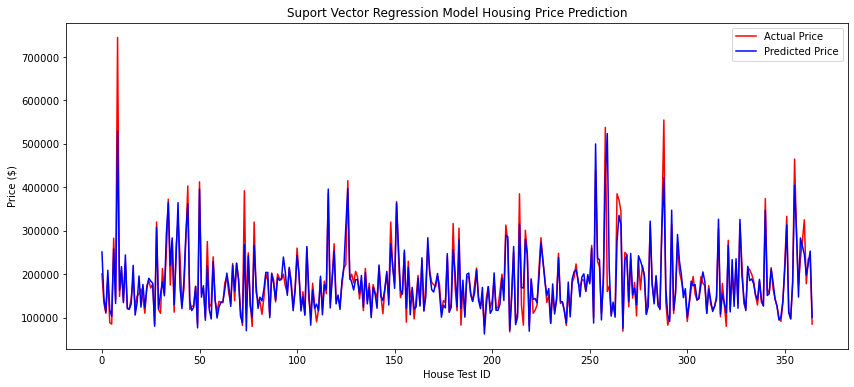

In [21]:
# visual plot of support vector regression prediction
plt.figure(figsize=(14,6))
plt.plot(range(len(y_test)), y_test, color='r', label='Actual Price')
plt.plot(range(len(y_test)), svm.predict(X_test_scaled), color='b', label='Predicted Price')
plt.title('Suport Vector Regression Model Housing Price Prediction')
plt.ylabel('Price ($)')
plt.xlabel('House Test ID')
plt.legend()
plt.show()